In [1]:
import math
import random
def f(x):
    return math.sqrt(x + 1) / 100 * (100 - x) - 0.625  

In [2]:
x0 = 10

In [3]:
s = 10
x = x0
for i in range(100):
    s += x - 10
    print(i, int(s))
    x = f(x) + x

0 10
1 12
2 17
3 25
4 35
5 49
6 66
7 86
8 109
9 136
10 166
11 199
12 235
13 275
14 317
15 362
16 410
17 461
18 514
19 569
20 627
21 686
22 748
23 811
24 876
25 943
26 1011
27 1080
28 1150
29 1222
30 1295
31 1369
32 1443
33 1518
34 1595
35 1671
36 1749
37 1827
38 1905
39 1984
40 2063
41 2143
42 2223
43 2304
44 2384
45 2465
46 2546
47 2628
48 2710
49 2791
50 2873
51 2955
52 3038
53 3120
54 3203
55 3285
56 3368
57 3451
58 3533
59 3616
60 3699
61 3782
62 3865
63 3949
64 4032
65 4115
66 4198
67 4281
68 4365
69 4448
70 4531
71 4615
72 4698
73 4782
74 4865
75 4948
76 5032
77 5115
78 5199
79 5282
80 5366
81 5449
82 5533
83 5616
84 5700
85 5783
86 5867
87 5950
88 6034
89 6117
90 6201
91 6285
92 6368
93 6452
94 6535
95 6619
96 6702
97 6786
98 6869
99 6953


In [4]:
random.uniform(0, 1)

0.2681751893579727

In [11]:
import math
import random
import numpy as np

# Helper functions
def grow(x):
    return 1 if math.sqrt(x + 1) / 100 >= random.uniform(0, 1) else 0

def shrink(x):
    return 1 if 0.625 / x >= random.uniform(0, 1) else 0

vecGrow = np.vectorize(grow)
vecShrink = np.vectorize(shrink)

def simulate_region(u, always = True):
    if u == 0:
        return 1 if always else grow(u)
    nonusers = np.array([u for _ in range(100-u)])
    users = np.array([u for _ in range(u)])
    u += sum(vecGrow(nonusers))
    u -= sum(vecShrink(users))
    return u

vecSimulate = np.vectorize(simulate_region)

# Hyperparameters
population = 100
revenue = 10
fixed_cost = 10
num_neighbors = 4
u0 = 10
m0 = 0.20
ms = [0.20, 0.22, 0.24, 0.26, 0.28, 0.30]
u = u0

# Simulation
num_simulation = 500

def simulate(u = u0, m = m0, revenue = revenue, fixed_cost = fixed_cost, num_neighbors = num_neighbors):
    neighbors = [0 for _ in range(num_neighbors)]
    for i in range(20):
        u = simulate_region(u)
        revenue += (u - fixed_cost)
        if u > m * population:
            neighbors = vecSimulate(neighbors)
            revenue += sum([u for u in neighbors if u != 0])
            revenue -= len(neighbors) * fixed_cost
        if revenue < 0:
            return 0
    return revenue

num_bankrupts = []
avg_revenue_no_bankrupt = []
avg_revenue_bankrupt = []
for m in ms:
    results = []
    num_bankrupt = 0
    for _ in range(num_simulation):
        res = simulate(m = m)
        if res == 0:
            num_bankrupt += 1
        results.append(res)
    num_bankrupts.append(num_bankrupt)
    avg_revenue_bankrupt.append(np.average(results))
    avg_revenue_no_bankrupt.append(np.average([r for r in results if r != 0]))

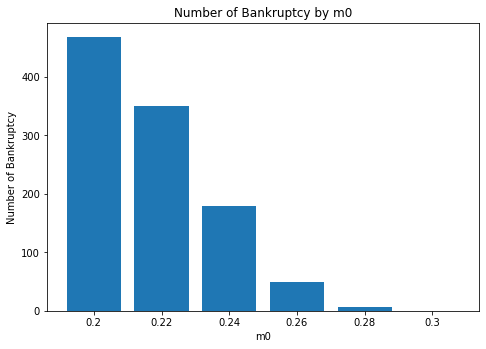

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Number of Bankruptcy')
ax.set_xlabel('m0')
ax.set_title('Number of Bankruptcy by m0')

ax.bar([str(m) for m in ms], num_bankrupts)
plt.show()

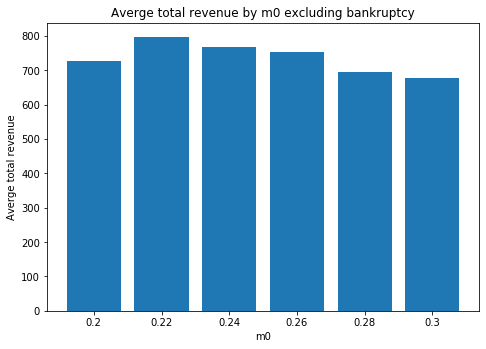

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Average total revenue')
ax.set_xlabel('m0')
ax.set_title('Average total revenue by m0 excluding bankruptcy')

ax.bar([str(m) for m in ms], avg_revenue_no_bankrupt)
plt.show()

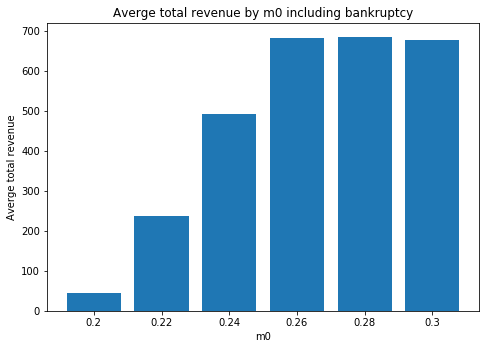

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Average total revenue')
ax.set_xlabel('m0')
ax.set_title('Average total revenue by m0 including bankruptcy')

ax.bar([str(m) for m in ms], avg_revenue_bankrupt)
plt.show()

In [17]:
num_bankrupts,avg_revenue_no_bankrupt,avg_revenue_bankrupt

([469, 351, 180, 49, 7, 0],
 [727.7741935483871,
  798.6040268456376,
  769.49375,
  754.9179600886918,
  695.5720081135903,
  677.204],
 [45.122, 237.984, 492.476, 680.936, 685.834, 677.204])

In [9]:
import math
import random
import numpy as np

# Helper functions
def grow(x):
    return 1 if math.sqrt(x + 1) / 100 >= random.uniform(0, 1) else 0

def shrink(x):
    return 1 if 0.625 / x >= random.uniform(0, 1) else 0

vecGrow = np.vectorize(grow)
vecShrink = np.vectorize(shrink)

def simulate_region(u, always = True):
    if u == 0:
        return 1 if always else grow(u)
    nonusers = np.array([u for _ in range(100-u)])
    users = np.array([u for _ in range(u)])
    u += sum(vecGrow(nonusers))
    u -= sum(vecShrink(users))
    return u

vecSimulate = np.vectorize(simulate_region)

# Hyperparameters
population = 100
revenue = 10
fixed_cost = 10
num_neighbors = 4
u0 = 10
m0 = 0.20
ms = [0.20, 0.22, 0.24, 0.26, 0.28, 0.30]
u = u0

# Simulation
num_simulation = 500

def simulate(u = u0, m = m0, revenue = revenue, fixed_cost = fixed_cost, num_neighbors = num_neighbors):
    neighbors = [0 for _ in range(num_neighbors)]
    for i in range(20):
        u = simulate_region(u)
        revenue += (u - fixed_cost)
        if u > m * population:
            neighbors = vecSimulate(neighbors)
            revenue += sum([u for u in neighbors if u != 0])
            revenue -= len(neighbors) * fixed_cost
        if revenue < 0:
            return 0
    return revenue

num_bankrupts = []
avg_revenue_no_bankrupt = []
avg_revenue_bankrupt = []
for m in ms:
    results = []
    num_bankrupt = 0
    for _ in range(num_simulation):
        res = simulate(m = m)
        if res == 0:
            num_bankrupt += 1
        results.append(res)
    num_bankrupts.append(num_bankrupt)
    avg_revenue_bankrupt.append(np.average(results))
    avg_revenue_no_bankrupt.append(np.average([r for r in results if r != 0]))
    
# Plotting
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Number of Bankruptcy')
ax.set_ylabel('m0')
ax.set_title('Number of Bankruptcy by m0')

ax.bar([str(m) for m in ms], num_bankrupts)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Average total revenue')
ax.set_ylabel('m0')
ax.set_title('Average total revenue by m0 excluding bankruptcy')

ax.bar([str(m) for m in ms], avg_revenue_no_bankrupt)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Average total revenue')
ax.set_ylabel('m0')
ax.set_title('Average total revenue by m0 including bankruptcy')

ax.bar([str(m) for m in ms], avg_revenue_bankrupt)
plt.show()

KeyboardInterrupt: 